In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import seaborn as sns
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data
from src.visualization.vis_LSTM_p.main import main_visualize

import matplotlib.pyplot as plt

## bayes opt

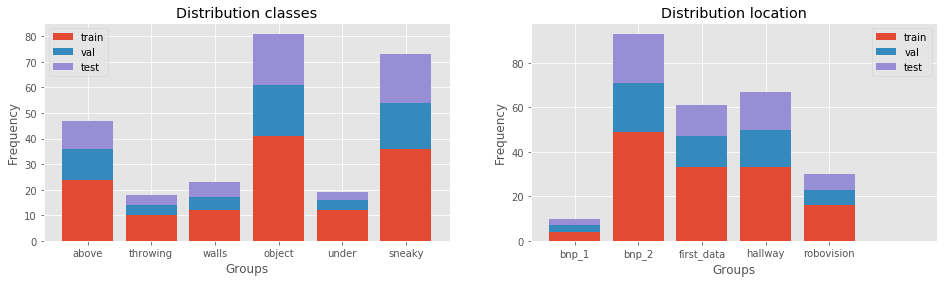

In [45]:
path                              =  './models/segmentated_shuffle/bayes_opt/DEEP2/'
RD                                = retrieve_data()
data,dict_,path_best,hist_best    = RD.get_best_D1(path)
BO_vis                            = plotting_tool(dict_)

BO_vis.plot_dist(data)


### DEEP1

In [46]:
path                                  =  './models/segmentated_shuffle/bayes_opt/DEEP1/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        =  './models/segmentated_shuffle/bayes_opt/DEEP1/'+str_list[-2]+'/'
BO_vis                                = plotting_tool(dict_)

lr           : 0.0001
time_dim     : 17
encoder      : [172]
decoder      : []
vector       : 271
AUC_v        : 0.647791113381001


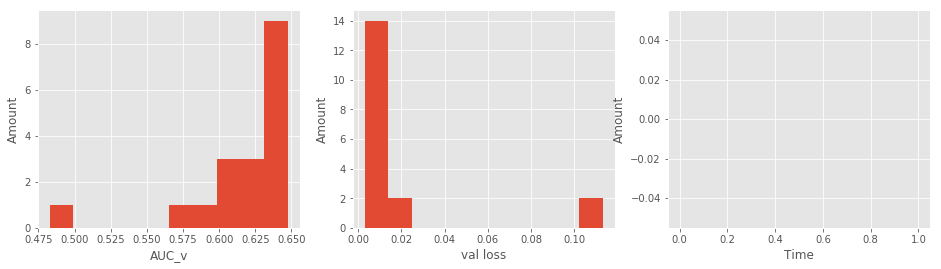

In [47]:
BO_vis.plot_dist_result(AUC_v_a,val_loss_a,[])

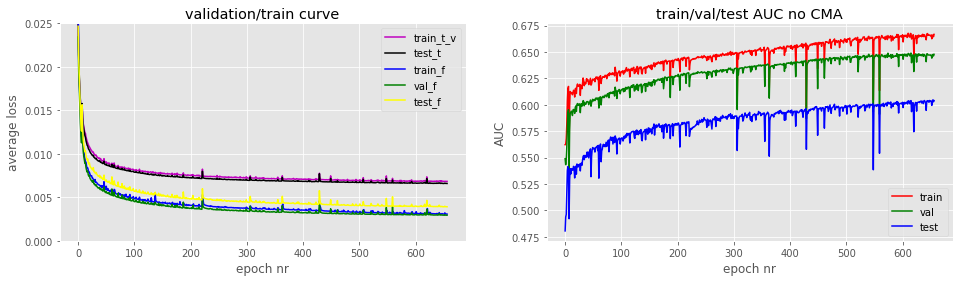

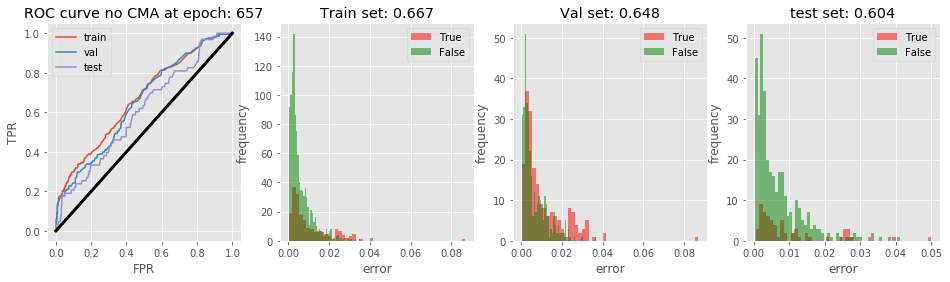

In [48]:
BO_vis.save_plots_no_cma(data)

In [ ]:
data_s = BO_vis._get_data_segmented(data,'segmentation')
BO_vis.save_ROC_segment(data_s,'segmentation')

In [ ]:
data_s = BO_vis._get_data_segmented(data,'location')
BO_vis.save_ROC_segment(data_s,'location')

In [ ]:
df = RD.get_scatter_data(path,['time_dim','vector','lr','val_f'])
df['AUC_v'] = RD.get_all(path,'AUC_v')

g = sns.pairplot(df, diag_kind="hist",kind = 'reg')
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

### vistool

BROKEN --> See DEEP2

# DEEP2

In [2]:
path                                 =  './models/segmentated_shuffle/bayes_opt/DEEP2/'
RD                                    = retrieve_data()
data,dict_,path_best,hist_nd,hist_d   = RD.get_best(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
dict_time                             = pickle_load(path+'dict_BO.p',None)

val_loss_a                            = RD.get_all(path,'val_f')

str_list                              = data['path_o'].split('/')
data['path_o']                        =  './models/segmentated_shuffle/bayes_opt/DEEP2/'+str_list[-2]+'/'
dict_['AUC_v']                        = data['AUC_v']
RD.print_dict(dict_)
BO_vis                                = plotting_tool(dict_)

'NoneType' object is not callable
'NoneType' object is not callable
'NoneType' object is not callable
'NoneType' object is not callable
'NoneType' object is not callable
lr           : 0.001267345303142497
time_dim     : 20
encoder      : [240, 443]
decoder      : [470]
vector       : 240
AUC_v        : 0.7134902394733854


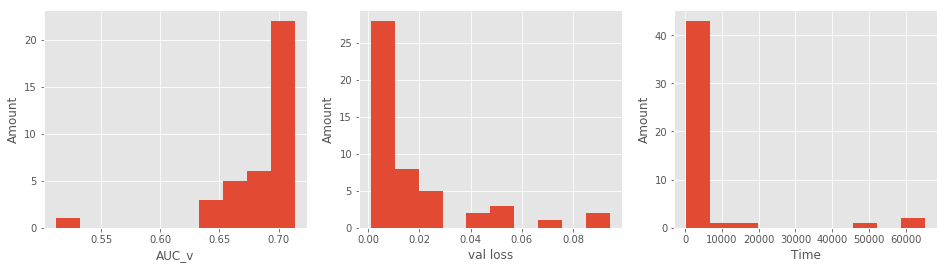

In [3]:
BO_vis.plot_dist_result(hist_d['AUC_v'],val_loss_a,dict_time['time_'])

Text(0,0.5,'loss')

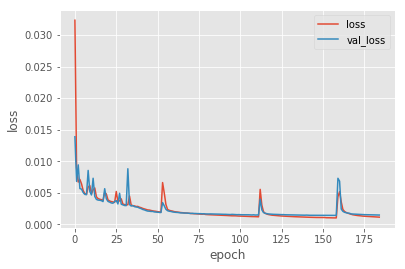

In [4]:
plt.plot(hist_nd['loss'],label = 'loss')
plt.plot(hist_nd['val_loss'],label = 'val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

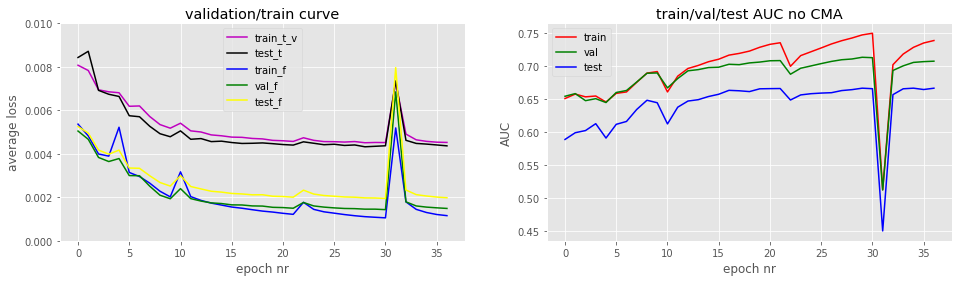

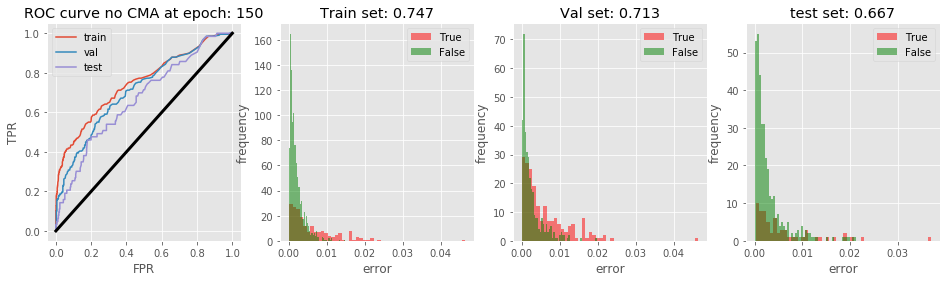

In [5]:
BO_vis.save_plots_no_cma(data)

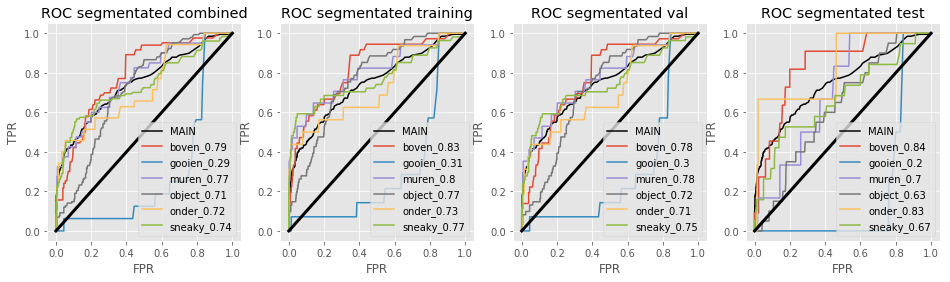

In [6]:
data_s = BO_vis._get_data_segmented(data,'segmentation')
BO_vis.save_ROC_segment(data_s,'segmentation')

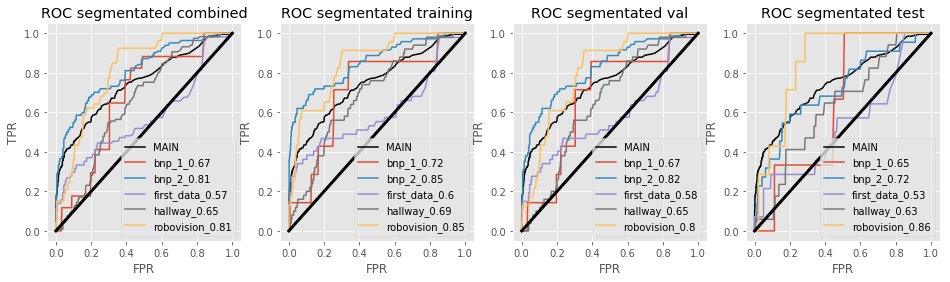

In [7]:
data_s = BO_vis._get_data_segmented(data,'location')
BO_vis.save_ROC_segment(data_s,'location')

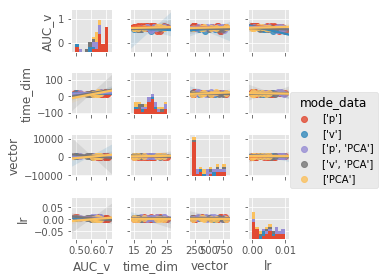

In [42]:
df = RD.get_scatter_data(path,['AUC_v','time_dim','vector','lr','mode_data'])

plt.rcParams['figure.figsize']=(30,10)


g = sns.pairplot(df, diag_kind="hist",kind = 'reg' , hue ='mode_data', size = 1)
# plt.savefig('./bayesopt.png')

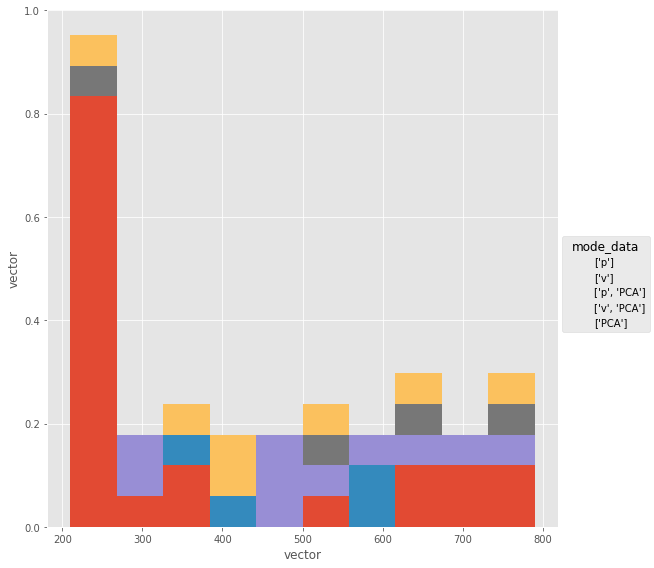

In [43]:
df = RD.get_scatter_data(path,['vector','mode_data'])
g = sns.pairplot(df, diag_kind="hist",kind = 'reg' , hue ='mode_data', size = 8)


In [ ]:
dict_c = {
        'path'       :  path_best,
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


### DEEP3

In [ ]:
path                                  =  './models/segmentated_shuffle/bayes_opt/DEEP3/'
RD                                    = retrieve_data()
data,dict_,path_best,hist_nd,hist_d   = RD.get_best(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
dict_time                             = pickle_load(path+'dict_BO.p',None)
str_list                              = data['path_o'].split('/')
data['path_o']                        =  './models/segmentated_shuffle/bayes_opt/DEEP3/'+str_list[-2]+'/'
val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = max(hist_d['AUC_v'])
RD.print_dict(dict_)
BO_vis                                = plotting_tool(dict_)

In [ ]:
BO_vis.plot_dist_result(hist_d['AUC_v'],val_loss_a,dict_time['time_'])

In [ ]:
plt.plot(hist_nd['loss'],label = 'loss')
plt.plot(hist_nd['val_loss'],label = 'val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
BO_vis.save_plots_no_cma(data)

In [ ]:
data_s = BO_vis._get_data_segmented(data,'segmentation')
BO_vis.save_ROC_segment(data_s,'segmentation')

In [ ]:
data_s = BO_vis._get_data_segmented(data,'location')
BO_vis.save_ROC_segment(data_s,'location')

In [ ]:
df = RD.get_scatter_data(path,['AUC_v','time_dim','vector','lr','mode_data'])
g = sns.pairplot(df, diag_kind="hist",kind = 'reg' , hue ='mode_data'  )

In [ ]:
dict_c = {
        'path'       :  path_best,
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()
